In [1]:
# Import the libraries we will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Bring in the data we will be working on in this project
df = pd.read_excel('Tax Simulation for Data science.xlsx')
# The data has been stored in the variable name df

In [3]:
# Let's view the head of our data
df.head()

,Unnamed: 0,Basic,Housing,Transport,Other Taxable Allowances,Other Non Taxable Allowances,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,True Tax,NetPay adjusted for Tax Only,NetPay adjusted for Tax+Pension+NHF
0,NaN,10000,NaN,NaN,NaN,NaN,10000,10000,800,250,16666.66,2000,19716.66,-9716.66,-680.1662,100.0,9900.0,8850.0
1,NaN,11000,NaN,NaN,NaN,NaN,11000,11000,880,275,16666.66,2200,20021.66,-9021.66,-631.5162,110.0,10890.0,9735.0
2,NaN,12000,NaN,NaN,NaN,NaN,12000,12000,960,300,16666.66,2400,20326.66,-8326.66,-582.8662,120.0,11880.0,10620.0
3,NaN,13000,NaN,NaN,NaN,NaN,13000,13000,1040,325,16666.66,2600,20631.66,-7631.66,-534.2162,130.0,12870.0,11505.0
4,NaN,14000,NaN,NaN,NaN,NaN,14000,14000,1120,350,16666.66,2800,20936.66,-6936.66,-485.5662,140.0,13860.0,12390.0


In [4]:
# Checking out for missing values in the data
df.isnull().sum()

Unnamed: 0                             20476
Basic                                      0
Housing                                20476
Transport                              20476
Other Taxable Allowances               20476
Other Non Taxable Allowances           20476
Gross                                      0
Taxable Gross                              0
Pension                                    0
NHF                                        0
Personal\nrelief                           0
Standard Relief                            0
Total Relief                               0
Net Taxable                                0
Computed Tax                               0
True Tax                                   0
NetPay adjusted for Tax Only               0
NetPay adjusted for Tax+Pension+NHF        0
dtype: int64

In [5]:
# Drop all missing values in the data
df.drop(['Unnamed: 0','Housing', 'Transport', 'Other Taxable Allowances', 'Other Non Taxable Allowances' ], axis=1, inplace=True)

In [6]:
#View the data again
df

,Basic,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,True Tax,NetPay adjusted for Tax Only,NetPay adjusted for Tax+Pension+NHF
0,10000,10000,10000,800,250,16666.66,2000,19716.66,-9716.66,-6.801662e+02,1.000000e+02,9.900000e+03,8.850000e+03
1,11000,11000,11000,880,275,16666.66,2200,20021.66,-9021.66,-6.315162e+02,1.100000e+02,1.089000e+04,9.735000e+03
2,12000,12000,12000,960,300,16666.66,2400,20326.66,-8326.66,-5.828662e+02,1.200000e+02,1.188000e+04,1.062000e+04
3,13000,13000,13000,1040,325,16666.66,2600,20631.66,-7631.66,-5.342162e+02,1.300000e+02,1.287000e+04,1.150500e+04
4,14000,14000,14000,1120,350,16666.66,2800,20936.66,-6936.66,-4.855662e+02,1.400000e+02,1.386000e+04,1.239000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20471,20481000,20481000,20481000,1638480,512025,204810.00,4096200,6451515.00,14029485.00,3.349743e+06,3.349743e+06,1.713126e+07,1.498075e+07
20472,20482000,20482000,20482000,1638560,512050,204820.00,4096400,6451830.00,14030170.00,3.349907e+06,3.349907e+06,1.713209e+07,1.498148e+07
20473,20483000,20483000,20483000,1638640,512075,204830.00,4096600,6452145.00,14030855.00,3.350072e+06,3.350072e+06,1.713293e+07,1.498221e+07
20474,20484000,20484000,20484000,1638720,512100,204840.00,4096800,6452460.00,14031540.00,3.350236e+06,3.350236e+06,1.713376e+07,1.498294e+07


In [7]:
#Shape of the dataset
df.shape
print('We have {} rows in our data'.format(df.shape[0]))
print('We have {} columns in our data'.format(df.shape[1]))

We have 20476 rows in our data
We have 13 columns in our data


In [8]:
#General Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20476 entries, 0 to 20475
Data columns (total 13 columns):
Basic                                  20476 non-null int64
Gross                                  20476 non-null int64
Taxable Gross                          20476 non-null int64
Pension                                20476 non-null int64
NHF                                    20476 non-null int64
Personal
relief                        20476 non-null float64
Standard Relief                        20476 non-null int64
Total Relief                           20476 non-null float64
Net Taxable                            20476 non-null float64
Computed Tax                           20476 non-null float64
True Tax                               20476 non-null float64
NetPay adjusted for Tax Only           20476 non-null float64
NetPay adjusted for Tax+Pension+NHF    20476 non-null float64
dtypes: float64(7), int64(6)
memory usage: 2.0 MB


In [9]:
# Statistical Information about the data
df.describe()

,Basic,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,True Tax,NetPay adjusted for Tax Only,NetPay adjusted for Tax+Pension+NHF
count,2.047600e+04,2.047600e+04,2.047600e+04,2.047600e+04,20476.000000,20476.000000,2.047600e+04,2.047600e+04,2.047600e+04,2.047600e+04,2.047600e+04,2.047600e+04,2.047600e+04
mean,1.024750e+07,1.024750e+07,1.024750e+07,8.198000e+05,256187.500000,103145.589745,2.049500e+06,3.228633e+06,7.018867e+06,1.667311e+06,1.667312e+06,8.580188e+06,7.504201e+06
std,5.911056e+06,5.911056e+06,5.911056e+06,4.728845e+05,147776.409794,58061.262154,1.182211e+06,1.860885e+06,4.050173e+06,9.718421e+05,9.718414e+05,4.939215e+06,4.318555e+06
min,1.000000e+04,1.000000e+04,1.000000e+04,8.000000e+02,250.000000,16666.660000,2.000000e+03,1.971666e+04,-9.716660e+03,-6.801662e+02,1.000000e+02,9.900000e+03,8.850000e+03
25%,5.128750e+06,5.128750e+06,5.128750e+06,4.103000e+05,128218.750000,51287.500000,1.025750e+06,1.615556e+06,3.513194e+06,8.258332e+05,8.258332e+05,4.302917e+06,3.764398e+06
50%,1.024750e+07,1.024750e+07,1.024750e+07,8.198000e+05,256187.500000,102475.000000,2.049500e+06,3.227962e+06,7.019538e+06,1.667356e+06,1.667356e+06,8.580144e+06,7.504157e+06
75%,1.536625e+07,1.536625e+07,1.536625e+07,1.229300e+06,384156.250000,153662.500000,3.073250e+06,4.840369e+06,1.052588e+07,2.508878e+06,2.508878e+06,1.285737e+07,1.124392e+07
max,2.048500e+07,2.048500e+07,2.048500e+07,1.638800e+06,512125.000000,204850.000000,4.097000e+06,6.452775e+06,1.403222e+07,3.350401e+06,3.350401e+06,1.713460e+07,1.498367e+07


In [10]:
#Correlation in the data
df.corr()

,Basic,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,True Tax,NetPay adjusted for Tax Only,NetPay adjusted for Tax+Pension+NHF
Basic,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
Gross,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
Taxable Gross,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
Pension,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
NHF,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
Personal\nrelief,0.999147,0.999147,0.999147,0.999147,0.999147,1.000000,0.999147,0.999199,0.999122,0.999148,0.999149,0.999146,0.999146
Standard Relief,1.000000,1.000000,1.000000,1.000000,1.000000,0.999147,1.000000,0.999999,1.000000,1.000000,1.000000,1.000000,1.000000
Total Relief,0.999999,0.999999,0.999999,0.999999,0.999999,0.999199,0.999999,1.000000,0.999998,0.999999,0.999999,0.999999,0.999999
Net Taxable,1.000000,1.000000,1.000000,1.000000,1.000000,0.999122,1.000000,0.999998,1.000000,0.999999,0.999999,1.000000,1.000000
Computed Tax,1.000000,1.000000,1.000000,1.000000,1.000000,0.999148,1.000000,0.999999,0.999999,1.000000,1.000000,0.999999,0.999999


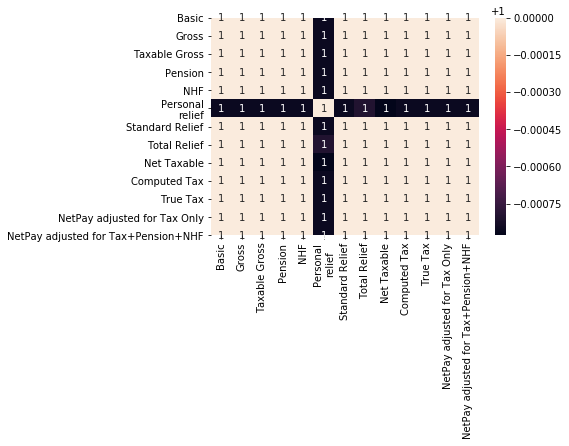

In [11]:
sns.heatmap(df.corr(), annot=True);

#### Building a Linear Regression Machine Learning Model on this Dataset

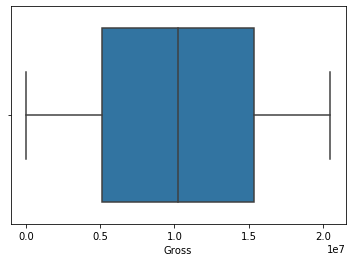

In [12]:
# Looking for outliers
sns.boxplot(df['Gross']);

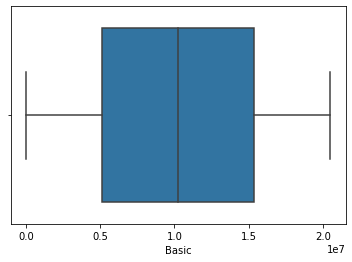

In [13]:
sns.boxplot(df['Basic']);

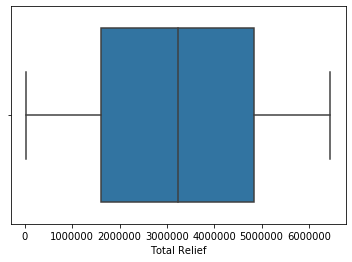

In [14]:
sns.boxplot(df['Total Relief']);

There are no outliers in the data

In [15]:
#Head view again
df.head()

,Basic,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,True Tax,NetPay adjusted for Tax Only,NetPay adjusted for Tax+Pension+NHF
0,10000,10000,10000,800,250,16666.66,2000,19716.66,-9716.66,-680.1662,100.0,9900.0,8850.0
1,11000,11000,11000,880,275,16666.66,2200,20021.66,-9021.66,-631.5162,110.0,10890.0,9735.0
2,12000,12000,12000,960,300,16666.66,2400,20326.66,-8326.66,-582.8662,120.0,11880.0,10620.0
3,13000,13000,13000,1040,325,16666.66,2600,20631.66,-7631.66,-534.2162,130.0,12870.0,11505.0
4,14000,14000,14000,1120,350,16666.66,2800,20936.66,-6936.66,-485.5662,140.0,13860.0,12390.0


In [16]:
# We will be dropping NetPay adjusted for Tax only to reduce the level of biases in our training
df.drop(['NetPay adjusted for Tax Only', 'True Tax'], axis=1, inplace=True)

In [17]:
# Let's drop the row that we cannot train
df.drop(df.index[0:30],axis=0, inplace=True)

In [18]:
df

,Basic,Gross,Taxable Gross,Pension,NHF,Personal\nrelief,Standard Relief,Total Relief,Net Taxable,Computed Tax,NetPay adjusted for Tax+Pension+NHF
30,40000,40000,40000,3200,1000,16666.66,8000,28866.66,11133.34,7.793338e+02,3.502067e+04
31,41000,41000,41000,3280,1025,16666.66,8200,29171.66,11828.34,8.279838e+02,3.586702e+04
32,42000,42000,42000,3360,1050,16666.66,8400,29476.66,12523.34,8.766338e+02,3.671337e+04
33,43000,43000,43000,3440,1075,16666.66,8600,29781.66,13218.34,9.252838e+02,3.755972e+04
34,44000,44000,44000,3520,1100,16666.66,8800,30086.66,13913.34,9.739338e+02,3.840607e+04
...,...,...,...,...,...,...,...,...,...,...,...
20471,20481000,20481000,20481000,1638480,512025,204810.00,4096200,6451515.00,14029485.00,3.349743e+06,1.498075e+07
20472,20482000,20482000,20482000,1638560,512050,204820.00,4096400,6451830.00,14030170.00,3.349907e+06,1.498148e+07
20473,20483000,20483000,20483000,1638640,512075,204830.00,4096600,6452145.00,14030855.00,3.350072e+06,1.498221e+07
20474,20484000,20484000,20484000,1638720,512100,204840.00,4096800,6452460.00,14031540.00,3.350236e+06,1.498294e+07


In [19]:
# Setting the training variables
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [20]:
# Importing the libraries we will; be using for our training
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.25, random_state=5)

In [22]:
model = LinearRegression()

In [23]:
model.fit(XTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
predictions = model.predict(XTest)

In [25]:
#Co-efficients of our features
print('Coefficients: \n', model.coef_) 

Coefficients: 
 [ 0.68958801 -0.58158233 -0.58157408  0.16422315  0.07366261 -1.92032586
  0.58930091  2.57035527  0.65002941 -1.        ]


In [26]:
# The accuracy of our model
accuracy = model.score(XTest,yTest)*100
accuracy

100.0

In [27]:
# geting the accuracy score using variance
print('Variance score: {}'.format(model.score(XTest, yTest)))

Variance score: 1.0


#### Errors In training and testing

In [28]:
plt.style.use('fivethirtyeight') 

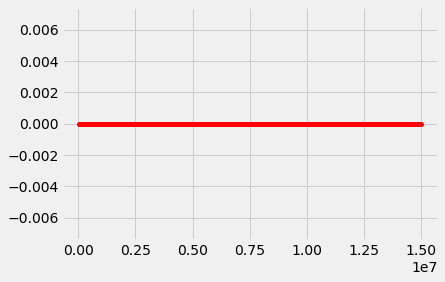

In [29]:
# Residual error in training
plt.scatter(model.predict(XTrain), model.predict(XTrain) - yTrain, 
            color = "red", s = 10, label = 'df') 
plt.show()
# There was no error in training

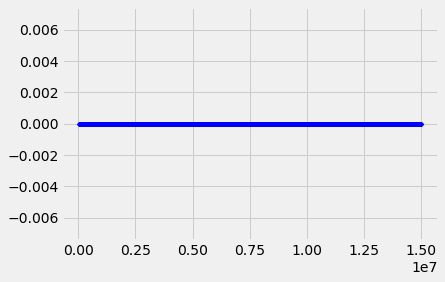

In [30]:
# Residual error in testing
plt.scatter(model.predict(XTest), model.predict(XTest) - yTest, 
            color = "blue", s = 10, label = 'df')
plt.show()
# There was no error in testing

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
yPred = model.predict(XTest)

In [33]:
mse = mean_squared_error(yTest,yPred)

In [34]:
mse

1.1506864986222188e-16

In [35]:
np.sqrt(mse)

1.0727005633550394e-08

In [36]:
model.predict(X[:1,:])

array([35020.66620002])

#### Random forest 

In [37]:
# Import random forest regressor
from sklearn.ensemble import RandomForestRegressor

In [38]:
sec_model = RandomForestRegressor(n_estimators=100, random_state=0)

In [39]:
sec_model.fit(XTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [40]:
print(sec_model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)


In [41]:
sec_model.score(XTest, yTest)

0.999999986037963

#### Root Mean Squared Error of Random forest

In [42]:
R_Pred = sec_model.predict(XTest)

In [43]:
mean_sq_error = mean_squared_error(yTest,yPred)

In [44]:
mean_sq_error

1.1506864986222188e-16

In [45]:
np.sqrt(mean_sq_error)

1.0727005633550394e-08

#### Testing

In [46]:
sec_model.predict(X[:1,:])

array([35477.6952])

In [47]:
X[:1,:]

array([[40000.    , 40000.    , 40000.    ,  3200.    ,  1000.    ,
        16666.66  ,  8000.    , 28866.66  , 11133.34  ,   779.3338]])

#### Gradient Boost

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
third_model = GradientBoostingRegressor(random_state=0)

In [50]:
third_model.fit(XTrain, yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto', random_state=0,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [51]:
third_model.predict(XTest[1:2])

array([14420183.65386125])

In [52]:
third_model.score(XTest, yTest)

0.9999536619813308

#### Root Mean Squared Error of the Gradient Boost

In [53]:
N_Pred = third_model.predict(XTest)

In [54]:
mean_error = mean_squared_error(yTest,N_Pred)

In [55]:
mean_error

855407371.2074734

In [56]:
np.sqrt(mean_error)

29247.348105554345

In [57]:
third_model.predict(X[:1,:])

array([57025.65387734])

#### Random forest's feature importance

In [58]:
importance = sec_model.feature_importances_

In [60]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.06998
Feature: 1, Score: 0.10757
Feature: 2, Score: 0.13339
Feature: 3, Score: 0.07566
Feature: 4, Score: 0.09161
Feature: 5, Score: 0.11518
Feature: 6, Score: 0.11832
Feature: 7, Score: 0.08097
Feature: 8, Score: 0.08370
Feature: 9, Score: 0.12362
